In [136]:
import json
import pdb
import ast
from tqdm import tqdm

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import streamlit as st

import os

In [3]:
input_types = ['works', 'authors', 'insts', 'venues']

data = {}
for input_type in input_types:
    DATA_FILE = './data/data.' + input_type + '.2012.v1.txt'
    with open(DATA_FILE, 'r') as f:
        input_json = [ast.literal_eval(work) for work in tqdm(f.readlines())]
        input_dict = [j for i in input_json for j in i]
        data[input_type] = pd.DataFrame.from_dict(input_dict).set_index('id')
        print(data[input_type].head())

100%|██████████| 823/823 [00:59<00:00, 13.80it/s]


                                                   doi  \
id                                                       
W2150066425  https://doi.org/10.1109/cvpr.2012.6248074   
W2158782408  https://doi.org/10.1109/iros.2012.6386109   
W2141125852  https://doi.org/10.1109/cvpr.2012.6248110   
W2021851106  https://doi.org/10.1109/iros.2012.6385773   
W2100960835    https://doi.org/10.1145/2090236.2090255   

                                                         title  \
id                                                               
W2150066425  Are we ready for autonomous driving? The KITTI...   
W2158782408   MuJoCo: A physics engine for model-based control   
W2141125852  Multi-column deep neural networks for image cl...   
W2021851106  A benchmark for the evaluation of RGB-D SLAM s...   
W2100960835                         Fairness through awareness   

                            type publication_date   host_venue  \
id                                                              

100%|██████████| 5653/5653 [00:51<00:00, 110.68it/s]


                                            orchid        display_name  \
id                                                                       
A100176519   https://orcid.org/0000-0003-2813-2235  Dieter Schmalstieg   
A100648250   https://orcid.org/0000-0003-4829-5533        Norman Sadeh   
A100654205   https://orcid.org/0000-0003-3427-0909       Peter Forbrig   
A1002842216                                   None      Claudio Fiegna   
A1008309793  https://orcid.org/0000-0003-0565-9640        Fred Buchali   

             works_count  cited_by_count created_date  \
id                                                      
A100176519           538            7969   2016-06-24   
A100648250           252            7525   2016-06-24   
A100654205           208             550   2016-06-24   
A1002842216          186            1671   2016-06-24   
A1008309793          186            2131   2016-06-24   

                                                      concepts  \
id             

100%|██████████| 241/241 [00:04<00:00, 49.42it/s] 


                         display_name country_code       type  \
id                                                              
I100066346    University of Stuttgart           DE  education   
I100930933  University College Dublin           IE  education   
I10091056         Kanazawa University           JP  education   
I100005738   Brigham Young University           US  education   
I101202996      Semmelweis University           HU  education   

                                              homepage_url  works_count  \
id                                                                        
I100066346  http://www.uni-stuttgart.de/home/index.en.html        61341   
I100930933                              http://www.ucd.ie/        58623   
I10091056                     http://www.kanazawa-u.ac.jp/        45652   
I100005738                       http://home.byu.edu/home/        45267   
I101202996    http://semmelweis.hu/english/the-university/        37855   

            cited_

100%|██████████| 35/35 [00:00<00:00, 78.00it/s]

                                            display_name  works_count  \
id                                                                      
V202381698                                      PLOS ONE       300815   
V11296630   Journal of the Acoustical Society of America       162788   
V168522863                               Cancer Research       152456   
V183492911                           Proceedings of SPIE       133038   
V10134376                                 Sustainability        57841   

            cited_by_count  is_oa     type created_date  \
id                                                        
V202381698         7199917   True  journal   2016-06-24   
V11296630          1305935  False  journal   2016-06-24   
V168522863         2711630  False  journal   2016-06-24   
V183492911          563561  False  journal   2016-06-24   
V10134376           474632   True  journal   2016-06-24   

                                                     concepts  \
id       

In [4]:
print(data['works'].info())

<class 'pandas.core.frame.DataFrame'>
Index: 128097 entries, W2150066425 to W995713601
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   doi                    126967 non-null  object
 1   title                  128097 non-null  object
 2   type                   128097 non-null  object
 3   publication_date       128097 non-null  object
 4   host_venue             128097 non-null  object
 5   open_access_is_oa      128097 non-null  bool  
 6   open_access_oa_status  128097 non-null  object
 7   authorships            128097 non-null  object
 8   page_count             128097 non-null  object
 9   cited_by_count         128097 non-null  int64 
 10  concepts               128097 non-null  object
 11  referenced_works       128097 non-null  object
 12  abstract               128097 non-null  object
 13  counts_by_year         128097 non-null  object
dtypes: bool(1), int64(1), object(12)
memory usa

In [5]:
print(data['authors'].info())

<class 'pandas.core.frame.DataFrame'>
Index: 141325 entries, A100176519 to A99634055
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   orchid          60389 non-null   object
 1   display_name    141325 non-null  object
 2   works_count     141325 non-null  int64 
 3   cited_by_count  141325 non-null  int64 
 4   created_date    141325 non-null  object
 5   concepts        141325 non-null  object
 6   counts_by_year  141325 non-null  object
dtypes: int64(2), object(5)
memory usage: 8.6+ MB
None


In [6]:
print(data['venues'].info())

<class 'pandas.core.frame.DataFrame'>
Index: 863 entries, V202381698 to V80171551
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   display_name    863 non-null    object
 1   works_count     863 non-null    int64 
 2   cited_by_count  863 non-null    int64 
 3   is_oa           27 non-null     object
 4   type            863 non-null    object
 5   created_date    863 non-null    object
 6   concepts        863 non-null    object
 7   counts_by_year  863 non-null    object
dtypes: int64(2), object(6)
memory usage: 60.7+ KB
None


In [7]:
print(data['insts'].info())

<class 'pandas.core.frame.DataFrame'>
Index: 6015 entries, I100066346 to I99686982
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   display_name             6015 non-null   object
 1   country_code             5979 non-null   object
 2   type                     5727 non-null   object
 3   homepage_url             5941 non-null   object
 4   works_count              6015 non-null   int64 
 5   cited_by_count           6015 non-null   int64 
 6   associated_institutions  6015 non-null   object
 7   concepts                 6015 non-null   object
 8   counts_by_year           6015 non-null   object
 9   created_date             6015 non-null   object
dtypes: int64(2), object(8)
memory usage: 516.9+ KB
None


In [100]:
# type - proceedings-article for all publications
X = pd.DataFrame(data['works'].loc[:, ['publication_date', 'page_count', 'title', \
    'concepts', 'abstract', 'cited_by_count', 'authorships', 'host_venue', \
        'open_access_is_oa', 'referenced_works', 'counts_by_year']])
X['page_count'].value_counts()
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 128097 entries, W2150066425 to W995713601
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   publication_date   128097 non-null  object
 1   page_count         128097 non-null  object
 2   title              128097 non-null  object
 3   concepts           128097 non-null  object
 4   abstract           128097 non-null  object
 5   cited_by_count     128097 non-null  int64 
 6   authorships        128097 non-null  object
 7   host_venue         128097 non-null  object
 8   open_access_is_oa  128097 non-null  bool  
 9   referenced_works   128097 non-null  object
 10  counts_by_year     128097 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 14.9+ MB
None


In [101]:
# X.drop('page_count', axis='columns', inplace=True)

X['publication_month'] = X['publication_date'].map(lambda x: x.split('-')[1]).astype(int)
# X.drop('publication_date', axis='columns', inplace=True)
X['publication_month'].value_counts()

12    17613
10    15331
5     14596
6     14321
11    13521
7     13269
3     10382
9      9406
4      6590
8      6059
1      4800
2      2209
Name: publication_month, dtype: int64

In [102]:
print(X['cited_by_count'].value_counts())

0       30492
1       19509
2       14074
3       10573
4        8027
        ...  
326         1
324         1
323         1
321         1
6636        1
Name: cited_by_count, Length: 402, dtype: int64


<AxesSubplot: xlabel='publication_month', ylabel='count'>

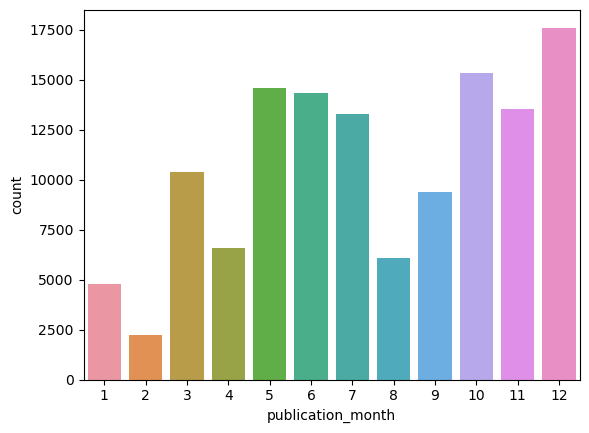

In [12]:
sns.countplot(data = X, x = 'publication_month')

In [ ]:
sns.heatmap(X.corr(), annot=True, linewidth=2, cmap=plt.cm.Blues)

<AxesSubplot: >

In [119]:
author_ids = set(np.intersect1d(np.concatenate(X['authorships'].map(lambda x: np.array([i[0] for i in x]))), data['authors'].index.values))

In [121]:
len(author_ids)

141325

In [125]:
inst_ids = set(np.intersect1d(np.concatenate(X['authorships'].map(lambda x: np.array([j for i in x for j in i[1]]))), data['insts'].index.values))

In [126]:
len(inst_ids)

6015

In [127]:
venue_ids = set(np.intersect1d(X['host_venue'].values, data['venues'].index.values))

In [128]:
len(venue_ids)

863

In [129]:
X['authors'] = X['authorships'].map(lambda x: [i[0] for i in x if i[0] in author_ids])

In [131]:
X['insts'] = X['authorships'].map(lambda x: [j for i in x for j in i[1] if j in inst_ids])

In [123]:
X['authors_mean_works'] = X['authors'].map(lambda author_ids : np.mean([data['authors'].loc[author_id, 'works_count'] for author_id in author_ids]))
X['authors_mean_citations'] = X['authors'].map(lambda author_ids : np.mean([data['authors'].loc[author_id, 'cited_by_count'] for author_id in author_ids]))

/Users/shreyanasa/miniconda3/envs/anc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/shreyanasa/miniconda3/envs/anc/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/shreyanasa/miniconda3/envs/anc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/shreyanasa/miniconda3/envs/anc/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [117]:
X['insts_mean_works'] = X['insts'].map(lambda inst_ids : np.mean([data['insts'].loc[inst_id, 'works_count'] for inst_id in inst_ids]))
X['insts_mean_citations'] = X['insts'].map(lambda inst_ids : np.mean([data['insts'].loc[inst_id, 'cited_by_count'] for inst_id in inst_ids]))

/Users/shreyanasa/miniconda3/envs/anc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/shreyanasa/miniconda3/envs/anc/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/shreyanasa/miniconda3/envs/anc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/shreyanasa/miniconda3/envs/anc/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [132]:
X['venue_works'] = X['host_venue'].map(lambda venue_id : data['venues'].loc[venue_id, 'works_count'] if venue_id in venue_ids else 0)
X['venue_citations'] = X['host_venue'].map(lambda venue_id : data['venues'].loc[venue_id, 'cited_by_count'] if venue_id in venue_ids else 0)

In [133]:
X.head()

,publication_date,page_count,title,concepts,abstract,cited_by_count,authorships,host_venue,open_access_is_oa,referenced_works,counts_by_year,publication_month,venue_works,venue_citations,insts,insts_mean_works,insts_mean_citations,authors,authors_mean_works,authors_mean_citations
id,,,,,,,,,,,,,,,,,,,,
W2150066425,2012-06-16,-1,Are we ready for autonomous driving? The KITTI...,"[[C154945302, 0.7994821], [C5799516, 0.7514366...","Today, visual recognition systems are still ra...",6636,"[[A2182886034, [I102335020]], [A2167431718, [I...",V4306417987,False,"[W1578985305, W1964814179, W1968799614, W19903...","[[2022, 570], [2021, 1427], [2020, 1363], [201...",6,17289,1459066,"[I102335020, I102335020]",85487.0,6948506.0,"[A2182886034, A2291154966]",282.500000,21755.500000
W2158782408,2012-12-24,-1,MuJoCo: A physics engine for model-based control,"[[C190390380, 0.9146959], [C169590947, 0.71768...",We describe a new physics engine tailored to m...,2177,"[[A2028747364, [I201448701]], [A2086424281, [I...",V4306418941,False,"[W154144259, W639693478, W1992116952, W2004116...","[[2022, 155], [2021, 616], [2020, 601], [2019,...",12,19485,295598,"[I201448701, I201448701, I201448701]",330243.0,37900809.0,"[A2028747364, A2086424281, A158011298]",74.666667,7714.333333
W2141125852,2012-06-16,-1,Multi-column deep neural networks for image cl...,"[[C190502265, 0.8540422], [C41008148, 0.794758...",Traditional methods of computer vision and mac...,1970,"[[A1966905718, [I2614128279]], [A2343548174, [...",V4306417987,True,"[W1601963269, W1968995181, W1987778624, W20268...","[[2022, 126], [2021, 237], [2020, 269], [2019,...",6,17289,1459066,"[I2614128279, I2614128279, I2614128279]",1833.0,229438.0,"[A2343548174, A2116333191]",294.500000,44196.500000
W2021851106,2012-12-24,-1,A benchmark for the evaluation of RGB-D SLAM s...,"[[C31972630, 0.78334284], [C154945302, 0.75840...","In this paper, we present a novel benchmark fo...",1888,"[[A2973958393, [I62916508]], [A1927103669, [I3...",V4306418941,True,"[W1514909517, W1556098723, W1656165940, W19652...","[[2022, 132], [2021, 318], [2020, 326], [2019,...",12,19485,295598,"[I62916508, I3133089283, I3133089283, I3133089...",50481.2,3329707.2,"[A343811326, A2153496801]",709.000000,25753.000000
W2100960835,2012-01-08,-1,Fairness through awareness,"[[C41008148, 0.59133285], [C95623464, 0.542300...","We study fairness in classification, where ind...",1655,"[[A208343995, [I1290206253]], [A2301637896, [I...",V4306418069,True,"[W178579835, W632002811, W1599656298, W1873763...","[[2022, 229], [2021, 453], [2020, 353], [2019,...",1,0,0,"[I1290206253, I4210085935, I185261750, I129020...",126929.4,10680796.0,"[A208343995, A2301637896, A672707272, A1093466...",209.600000,11635.800000


In [134]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128097 entries, W2150066425 to W995713601
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   publication_date        128097 non-null  object 
 1   page_count              128097 non-null  object 
 2   title                   128097 non-null  object 
 3   concepts                128097 non-null  object 
 4   abstract                128097 non-null  object 
 5   cited_by_count          128097 non-null  int64  
 6   authorships             128097 non-null  object 
 7   host_venue              128097 non-null  object 
 8   open_access_is_oa       128097 non-null  bool   
 9   referenced_works        128097 non-null  object 
 10  counts_by_year          128097 non-null  object 
 11  publication_month       128097 non-null  int64  
 12  venue_works             128097 non-null  int64  
 13  venue_citations         128097 non-null  int64  
 14  insts      

In [135]:
X.corr()

,cited_by_count,open_access_is_oa,publication_month,venue_works,venue_citations,insts_mean_works,insts_mean_citations,authors_mean_works,authors_mean_citations
cited_by_count,1.000000,0.093667,-0.032664,0.018196,0.156656,0.086823,0.113346,0.035680,0.099836
open_access_is_oa,0.093667,1.000000,-0.051094,0.280095,0.145855,0.083927,0.123003,0.054708,0.078379
publication_month,-0.032664,-0.051094,1.000000,-0.050930,-0.097912,-0.015656,-0.030614,0.008234,-0.008246
venue_works,0.018196,0.280095,-0.050930,1.000000,0.397700,-0.002126,0.019048,0.031869,0.029724
venue_citations,0.156656,0.145855,-0.097912,0.397700,1.000000,0.118726,0.148036,0.084176,0.127512
insts_mean_works,0.086823,0.083927,-0.015656,-0.002126,0.118726,1.000000,0.904139,0.150013,0.176444
insts_mean_citations,0.113346,0.123003,-0.030614,0.019048,0.148036,0.904139,1.000000,0.150311,0.204923
authors_mean_works,0.035680,0.054708,0.008234,0.031869,0.084176,0.150013,0.150311,1.000000,0.862061
authors_mean_citations,0.099836,0.078379,-0.008246,0.029724,0.127512,0.176444,0.204923,0.862061,1.000000


In [ ]:
X.to_csv('./data/input_intermediate1.csv')